In [242]:
import pandas as pd
from time import *
from tensorflow.keras import initializers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
df = pd.read_excel('Stock_Price_Training_Data.xlsx')

df.head()

#extract close values
data = df.filter(['Close'])
dataset = data.values
#calculate 80% of the given data for training
training_data_len = math.ceil(len(data)*0.8)
#scale data
scaler  = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)
train_data = scaled_data[0:training_data_len , :]
#split into x_train and y_train datasets
x_train = [] #training features
y_train = [] 

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0])
#convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
#reshape our data into 3d for lstm
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #reshape gati thelei 3sdiastato
#print(x_train.shape)

#build the model
model = Sequential()
model.add(LSTM(36, return_sequences=True, input_shape=(x_train.shape[1], 1), dropout = 0.2 ))
model.add(LSTM(36, return_sequences=False))
model.add(Dense(25, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()))
model.add(Dense(1))
start = time()
model.compile(optimizer='adam', loss='mean_squared_error')
print ('compilation time : ', time() - start)
model.fit(x_train, y_train, batch_size = 1, epochs = 1)
#creating testing datasets
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

[[-0.52485426]
 [-0.51697146]
 [-0.54243898]
 ...
 [-0.1900831 ]
 [-0.19631217]
 [-0.22654797]]
compilation time :  0.0076482295989990234
947/947 [==============================] - 29s 27ms/step - loss: 0.0554


In [236]:
x_test = np.array(x_test)

In [237]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [238]:
#models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [239]:
#root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.5942465392336898

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


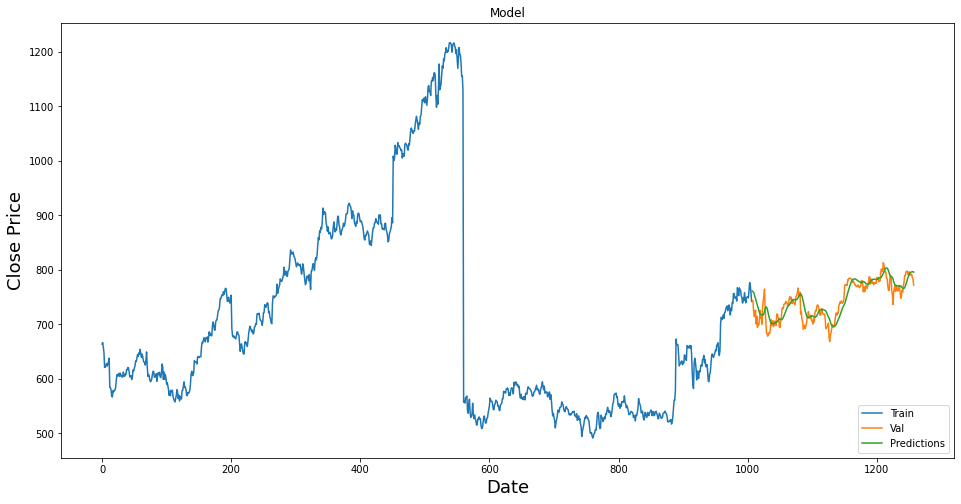

In [240]:
#plot the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [241]:
#print results
valid

,Close,Predictions
1007,742.58,761.095398
1008,743.62,760.008789
1009,726.39,758.506409
1010,714.47,755.672241
1011,716.03,751.452881
...,...,...
1253,789.91,795.702454
1254,791.55,796.283997
1255,785.05,796.659180
1256,782.79,796.408569


In [227]:
#find prediction for next 30 days by geting the last 30 days closing price

for i in range(0,30):
  if (i!= 0):
    data = data.append(arr, ignore_index = True) 
 
  past_30_days = data[-30:].values
  past_30_days_scaled = scaler.transform(past_30_days)
  #print(past_30_days)
  x_test2 = []
  x_test2.append(past_30_days_scaled)
  x_test2 = np.array(x_test2)
  x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
  pred = model.predict(x_test2)
  pred = scaler.inverse_transform(pred)
  d = {'Close': [float(pred)]}
  arr = pd.DataFrame(data=d)
  #print(arr)
  print("pred = ",float(pred))

pred =  801.45654296875
pred =  801.5092163085938
pred =  802.5999145507812
pred =  804.294189453125
pred =  806.3809204101562
pred =  808.7457885742188
pred =  811.3121337890625
pred =  814.038330078125
pred =  816.91259765625
pred =  819.947265625
pred =  823.1353149414062
pred =  826.4617309570312
pred =  829.9197387695312
pred =  833.5357055664062
pred =  837.2950439453125
pred =  841.21435546875
pred =  845.290771484375
pred =  849.5484008789062
pred =  853.9849853515625
pred =  858.6158447265625
pred =  863.4484252929688
pred =  868.500732421875
pred =  873.7656860351562
pred =  879.2528686523438
pred =  884.974853515625
pred =  890.9398803710938
pred =  897.1506958007812
pred =  903.6078491210938
pred =  910.3270874023438
pred =  917.3038940429688
